# Завдання

Побудуйте класифікатор на основі дерева ухвалення рішень, використовуючи тренувальний датасет ірісів Фішера - тренувальний набір ознак по трьох видах ірисів.

Код завантаження датасету:
    
**from sklearn.datasets import load_iris**

**iris = datacets.load_iris()**

# Розв'язок

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = pd.Series(iris.target)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
y = iris_data[['target']]
X = iris_data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [7]:
y_pred = clf_model.predict(X_test)

In [8]:
metrics.accuracy_score(y_test, y_pred)

1.0

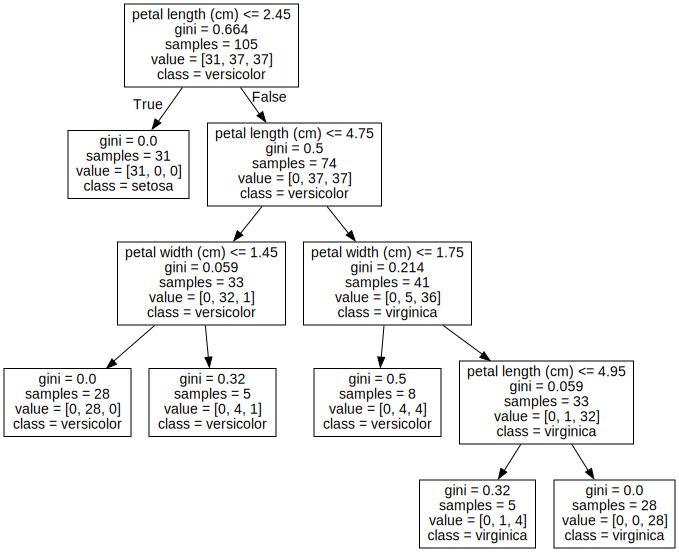

In [9]:
target = list(iris_data['target'].unique())
feature_names = list(X.columns)
dot_data = tree.export_graphviz(clf_model, feature_names=feature_names, class_names=iris.target_names)
graph = graphviz.Source(dot_data)
graph

In [10]:
importance = clf_model.feature_importances_
importance

array([0.        , 0.        , 0.94917029, 0.05082971])

In [11]:
sorted_imoptance = pd.DataFrame({'feature': feature_names, 'importance': importance}).sort_values('importance', ascending=False)
sorted_imoptance

,feature,importance
2,petal length (cm),0.94917
3,petal width (cm),0.05083
0,sepal length (cm),0.00000
1,sepal width (cm),0.00000


Побудована класифікаційна модель характеризується високою точністю. При цьому для прийняття рішення щодо класифікації мають значення критерії ширини пелюстки (0,94917) і зі значно меншою важливістю - довжина пелюстки (0,05083), а критерії ширини та довжини чашолистки мають нульову вагу важливості.